In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)

import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [71]:
df.rename(columns ={'Make' : "make",
                    'Model' : "model",
                    'Vehicle Class' :  "vehicle_class",
                    'Engine Size(L)': "engine_size",
                    'Cylinders': "cylinders",
                   'Transmission' : "transmission",
                    'Fuel Type' : "fuel_type",
                    'Fuel Consumption City (L/100 km)' : "fuel_cons_city",
                   'Fuel Consumption Hwy (L/100 km)': "fuel_cons_hwy",
                    'Fuel Consumption Comb (L/100 km)' :"fuel_cons_comb",
                   'Fuel Consumption Comb (mpg)' : "fuel_cons_comb_mpg"
                    , 'CO2 Emissions(g/km)' : "co2"
                   }, inplace = True)

In [72]:
df.sample(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
1900,MINI,COOPER S 3 DOOR,SUBCOMPACT,2.0,4,AS6,Z,9.2,7.0,8.2,34,189
4636,CHRYSLER,300 FFV,FULL-SIZE,3.6,6,A8,E,17.1,10.6,14.2,20,234
2259,AUDI,TT COUPE QUATTRO,SUBCOMPACT,2.0,4,AM6,X,10.1,7.8,9.1,31,209
2307,BMW,640i xDRIVE CABRIOLET,SUBCOMPACT,3.0,6,AS8,Z,11.9,8.1,10.2,28,238
1041,VOLKSWAGEN,JETTA,COMPACT,2.0,4,A6,X,10.6,8.0,9.4,30,216
939,SCION,xB,STATION WAGON - SMALL,2.4,4,AS4,X,10.9,8.6,9.9,29,228
1832,MERCEDES-BENZ,C 300 4MATIC,COMPACT,2.0,4,AS7,Z,10.1,7.8,9.0,31,207
562,JAGUAR,XJR LWB,FULL-SIZE,5.0,8,AS8,Z,15.8,10.2,13.3,21,306
7215,MITSUBISHI,Outlander 4WD,SUV - SMALL,2.4,4,AV6,X,9.9,8.1,9.1,31,212
7250,PORSCHE,911 Carrera S,MINICOMPACT,3.0,6,AM8,Z,13.1,9.7,11.5,25,271


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                7385 non-null   object 
 1   model               7385 non-null   object 
 2   vehicle_class       7385 non-null   object 
 3   engine_size         7385 non-null   float64
 4   cylinders           7385 non-null   int64  
 5   transmission        7385 non-null   object 
 6   fuel_type           7385 non-null   object 
 7   fuel_cons_city      7385 non-null   float64
 8   fuel_cons_hwy       7385 non-null   float64
 9   fuel_cons_comb      7385 non-null   float64
 10  fuel_cons_comb_mpg  7385 non-null   int64  
 11  co2                 7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_cons_comb_mpg,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


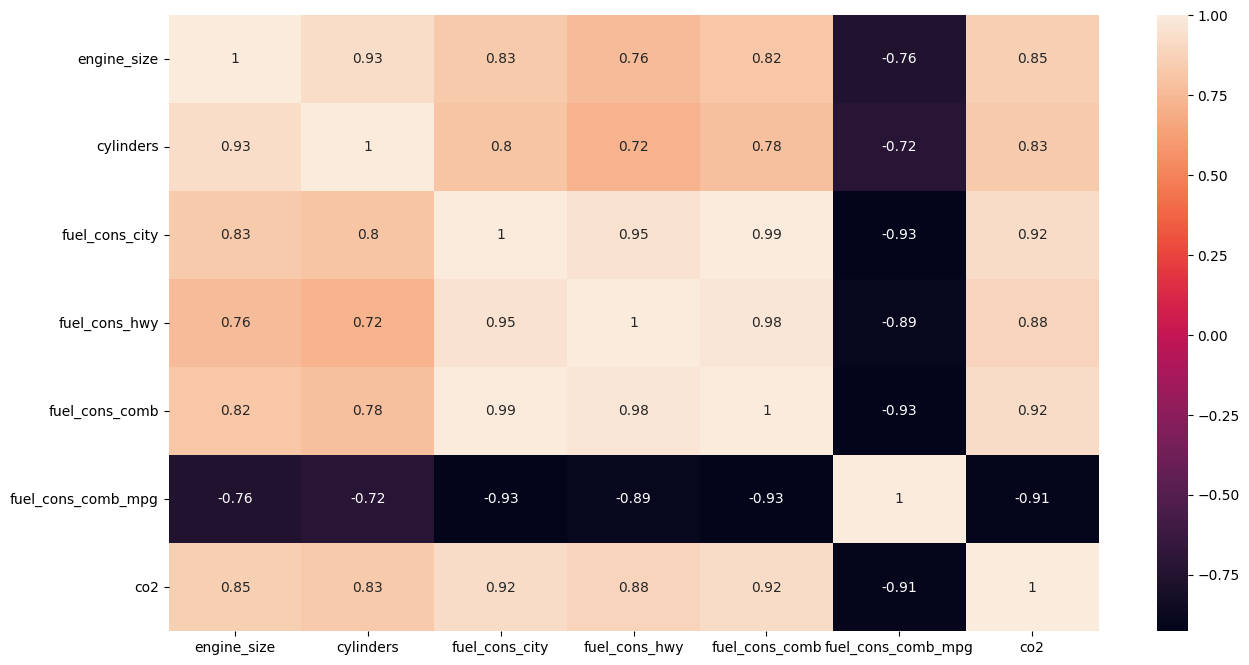

In [75]:
sns.heatmap(df.corr(), annot = True)
plt.show()

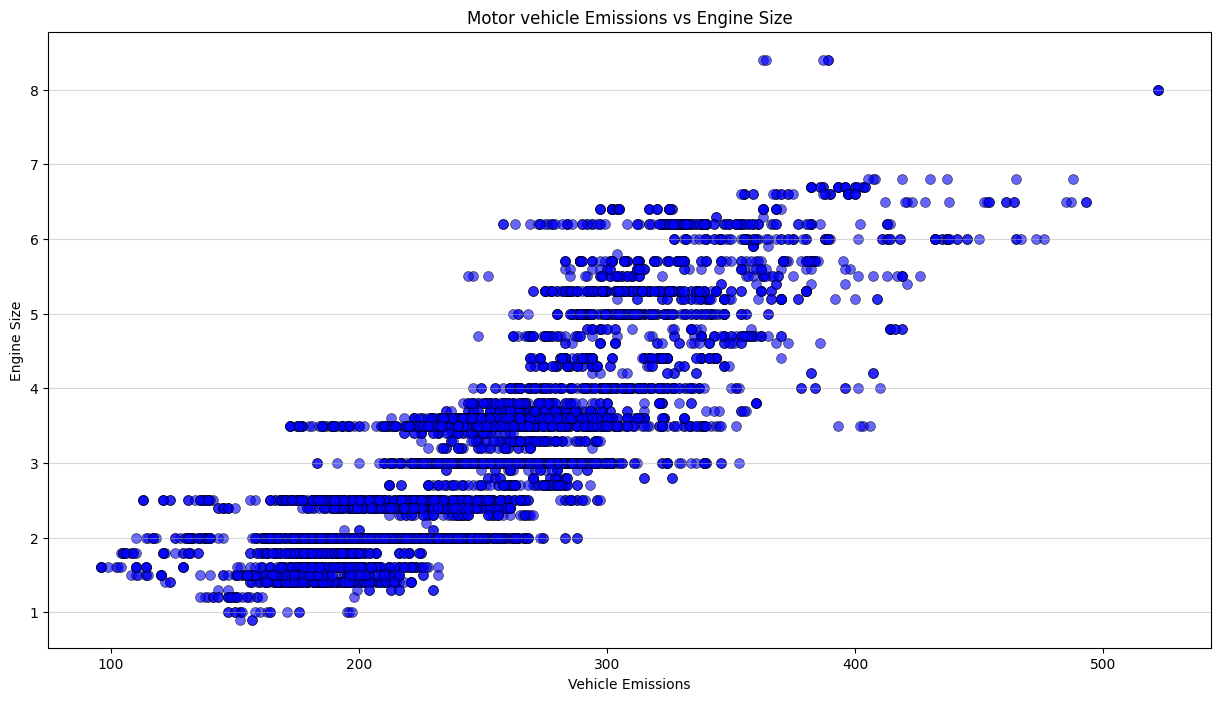

In [77]:
sns.scatterplot(data = df, x = "co2", y = "engine_size", alpha = 0.6, color = "blue" , edgecolor = "k", s = 50)
plt.xlabel("Vehicle Emissions")
plt.ylabel("Engine Size")
plt.title("Motor vehicle Emissions vs Engine Size")
plt.grid(axis = "y", alpha = 0.5)
plt.show()


In [78]:

df.fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

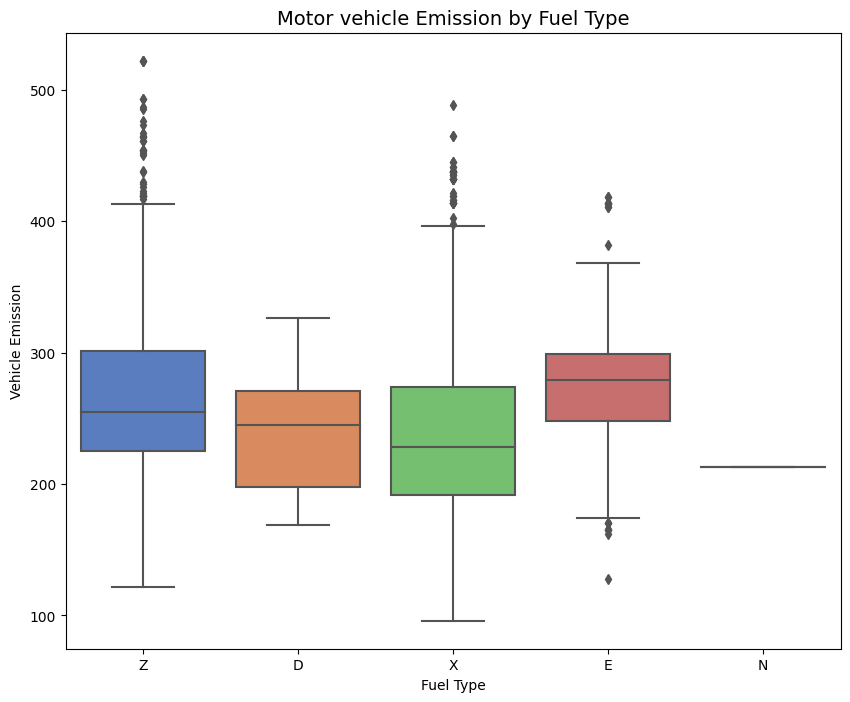

In [81]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = "fuel_type", y = "co2", data = df, palette = "muted")

plt.title("Motor vehicle Emission by Fuel Type", fontsize = 14)
plt.xlabel("Fuel Type")
plt.ylabel("Vehicle Emission")

plt.show()

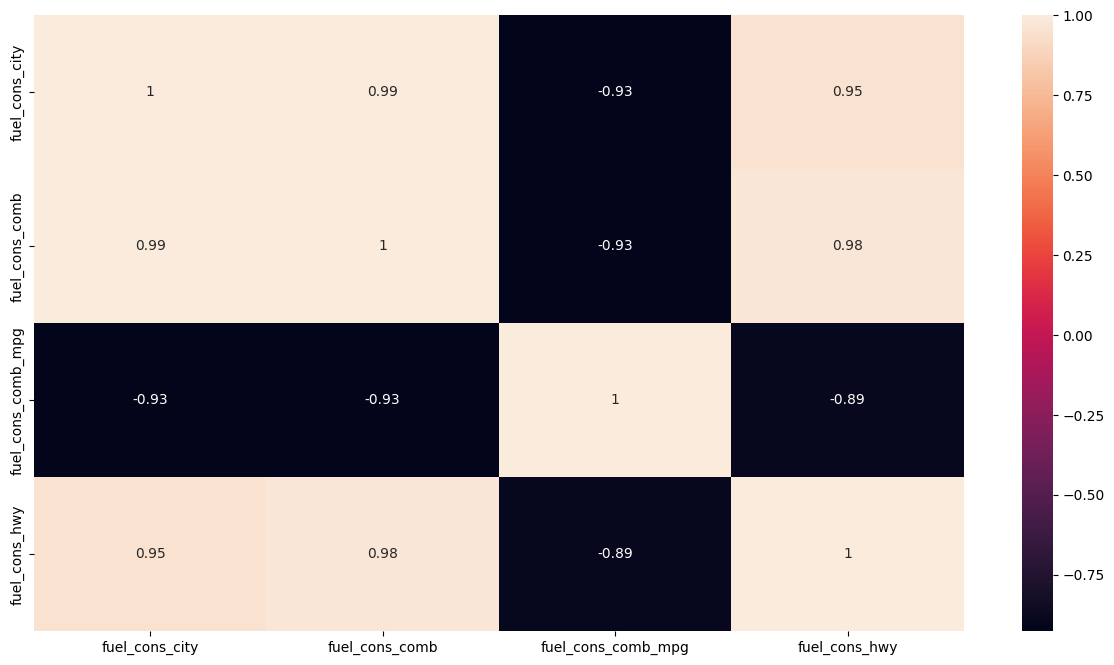

In [82]:
sns.heatmap(df[["fuel_cons_city", "fuel_cons_comb", "fuel_cons_comb_mpg", "fuel_cons_hwy"]].corr(), annot = True);